In [1]:
#Defining the DataSet
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator
from sklearn import datasets
from sklearn.model_selection import train_test_split

SEED = 123
qasm_sim = AerSimulator()

In [2]:

n_samples=25
a = 2
b = -2

x1, _ = datasets.make_gaussian_quantiles(mean = [2*a,2*a], cov=2.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
x2, _ = datasets.make_gaussian_quantiles(mean = [1*a,1*b], cov=3.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
x3, _ = datasets.make_gaussian_quantiles(mean = [1*b,1*a], cov=5.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)
x4, _ = datasets.make_gaussian_quantiles(mean = [4*b,4*b], cov=6.0, n_samples=n_samples, n_features=2, n_classes=2, random_state=SEED)

y1 = np.array([0 for i in range(n_samples)])
y2 = np.array([1 for i in range(n_samples)])
y3 = np.array([2 for i in range(n_samples)])
y4 = np.array([3 for i in range(n_samples)])

x = np.concatenate((x1, x2, x3, x4))
y = np.concatenate((y1, y2, y3, y4))
print(x)


[[  3.44718421   4.81148403]
 [  3.80191292   2.78129454]
 [  4.47883723   3.98326915]
 [  3.63849962   0.04219733]
 [  3.37211469   3.38573454]
 [  4.40019203   1.86977759]
 [  6.10914344   3.09645613]
 [  2.46468648   5.41045946]
 [  1.49467386   3.01022412]
 [  0.5681573    3.39342594]
 [  2.75614778   4.40110961]
 [  5.41994664   4.54615004]
 [  5.79030423   2.77424397]
 [  5.04279664   6.10821345]
 [  2.86103975   1.55670637]
 [  7.38331541   4.58394598]
 [  3.03991      3.86606129]
 [  7.11965624   7.09258255]
 [  5.31162995   3.75444206]
 [  2.67653105   5.66287338]
 [  5.38414173   7.16521266]
 [  4.00402473   4.97329389]
 [  3.18173568   6.33548395]
 [  5.28284047   1.97954038]
 [  2.22674495   3.09808318]
 [  1.3229417   -1.00613909]
 [  1.75739386  -3.49260326]
 [  2.58645344  -2.02049102]
 [  1.55725426  -6.84729852]
 [  1.23100069  -2.75231848]
 [  2.49013314  -4.60897898]
 [  4.58316261  -3.10661072]
 [  0.11963264  -0.27254701]
 [ -1.06838534  -3.21222293]
 [ -2.20313174

In [3]:
# Normalizatin
x[:,0] = x[:,0] / (np.max(x[:,0]) - np.min(x[:,0]))
x[:,1] = x[:,1] / (np.max(x[:,1]) - np.min(x[:,1]))

num_classes = 4
num_features = 2
adhoc_dimension = 2
x_blue = x[y==0]
x_red = x[y==1]
x_green = x[y==3]
x_m = x[y==4]

test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=SEED, stratify=y)

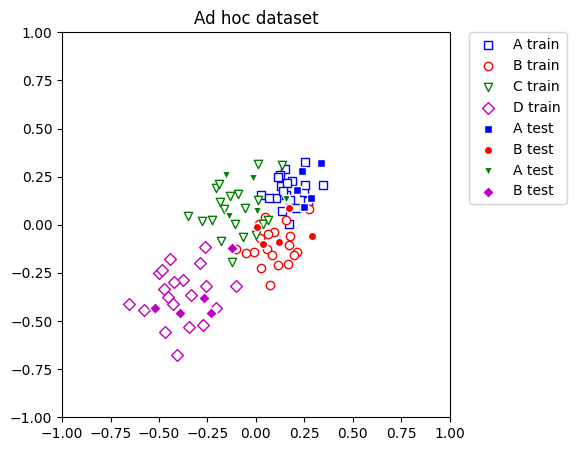

In [4]:
# Plot of the dataset

def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(x_train, y_train,x_test, y_test):

# train_features, train_labels, test_features, test_labels
    plt.figure(figsize=(5, 5))
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    # plt.imshow(
    #     np.asmatrix(adhoc_total).T,
    #     interpolation="nearest",
    #     origin="lower",
    #     cmap="RdBu",
    #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
    # )

    # A train plot
    plot_features(plt, x_train,  y_train, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, x_train,  y_train, 1, "o", "w", "r", "B train")

    # C train plot
    plot_features(plt, x_train,  y_train, 2, "v", "w", "g", "C train")

    # D train plot
    plot_features(plt, x_train,  y_train, 3, "D", "w", "m", "D train")

    # A test plot
    plot_features(plt, x_test, y_test, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, x_test, y_test, 1, "o", "r", "w", "B test")

    # C test plot
    plot_features(plt, x_test, y_test, 2, "v", "g", "w", "A test")

    # D test plot
    plot_features(plt, x_test, y_test, 3, "D", "m", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()


plot_dataset(x_train, y_train,x_test, y_test)